In [1]:
import matplotlib.pyplot as plt
%matplotlib inline 

from keras.preprocessing.image import ImageDataGenerator

from keras.models import *
from keras.layers import *
from keras.optimizers import rmsprop,Adam
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix
import seaborn as sn
import pandas as pd
import h5py
import pickle
import os
from random import randint
from keras.utils import np_utils
from imblearn.over_sampling import SMOTE

import time
from PIL import Image

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# PyDrive reference:
# https://gsuitedevs.github.io/PyDrive/docs/build/html/index.html



# 3. Load a file by ID and print its contents.

downloaded = drive.CreateFile({'id':'1j3Geg5SOVTaujNV2NTN1M_TS9eXlLo9U'}) # data set de imagenes almacenado en google drive
data= downloaded.GetContentFile('train_data.hdf5')
downloaded_l = drive.CreateFile({'id':'1R1e_lUiCpFoCFOM0AJOa8YHyBzvXttnl'})  # data set de labels almacenado en google drive
downloaded_l.GetContentFile('data_y.csv')



     |████████████████████████████████| 993kB 1.4MB/s 


W0808 07:32:43.505459 140633012524928 __init__.py:44] file_cache is unavailable when using oauth2client >= 4.0.0 or google-auth
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import Lock

In [0]:

#from imblearn.over_sampling import SMOTE

cargar dataset

In [3]:
dataset1 = h5py.File('train_data.hdf5', "r") #leer dataset desde el disco local
    #leer los elementos del dataset
D = np.array(dataset1['train_data'][:])

l=pd.read_csv('data_y.csv') #leer etiquetas desde al archivo labelsss.csv


labels=np.array(l.clase)
labels=labels.reshape(1638,1)
x_train_=D

dataset1.close()



# Print the shape of variables
print(x_train_.shape) #visualizamos la forma de nuestro dataset      
print(labels.shape)

(1638, 128, 128, 3)
(1638, 1)


In [4]:


n_classes = len(set(l.clase))
print('numero de clases:',n_classes)

print("cantidad de datos para señales 30km : {}".format(sum(labels==0)))
print("cantidad de datos para señales 40km : {} \n".format(sum(labels==1)))
print("cantidad de datos para señales 60km: {}".format(sum(labels==2)))
print("cantidad de datos para señales pare: {} \n".format(sum(labels==3)))
print("cantidad de datos para señales no parquear: {}".format(sum(labels==4)))




numero de clases: 5
cantidad de datos para señales 30km : [505]
cantidad de datos para señales 40km : [195] 

cantidad de datos para señales 60km: [230]
cantidad de datos para señales pare: [273] 

cantidad de datos para señales no parquear: [435]


In [0]:
print(labels)

[[0]
 [0]
 [0]
 ...
 [4]
 [4]
 [4]]


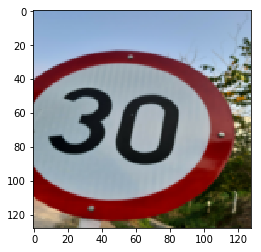

In [0]:

plt.imshow(x_train_[5])


In [5]:


Y_train1 = np_utils.to_categorical (labels, n_classes ) # convertir labels en formato  one hot encode
#Y_test1 = np_utils.to_categorical (y_test, n_classes )
'''

y_train_=to_categorical(y_train,n_clases)
y_test_=to_categorical(y_test,n_clases)'''
print(Y_train1.shape)
print(Y_train1.dtype)

(1638, 5)
float32


In [6]:
x_train=x_train_.astype('float32') # normalizacion de los datos de train
x_train=x_train_/255 
'''X_test=X_test1.astype('float32')
X_test=X_test_/255'''

"X_test=X_test1.astype('float32')\nX_test=X_test_/255"

In [7]:
X_train,X_test,y_train,y_test=train_test_split(x_train_,Y_train1,test_size=0.3,random_state=42)

print('X_train',X_train.shape) # split de los datos de entrenamiento y test
print('y_train',y_train.shape)
print('x_test',X_test.shape)
print('y_test',y_test.shape)

X_train (1146, 128, 128, 3)
y_train (1146, 5)
x_test (492, 128, 128, 3)
y_test (492, 5)


#modelado

In [8]:
 


model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

k=model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4,4)))


model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4,4)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4,4)))

model.add(Dropout(0.5))


W0808 07:33:53.945516 140633012524928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0808 07:33:53.987203 140633012524928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0808 07:33:53.995184 140633012524928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0808 07:33:54.033703 140633012524928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0808 07:33:54.066120 140633012524928 deprecation_wrapp

In [0]:
x_train.shape[1:]

(128, 128, 3)

clasificacion

In [0]:
model.add(Flatten()) # se aplica un aplanado a la ultima capa
model.add(Dense(512)) # se aplica una capa densa (capa completamente conectada) con 512 neuronas
model.add(Activation('relu')) # una funcion relu
model.add(Dropout(0.5)) # vamos apagando el 25% de las neuronas
model.add(Dense(5)) # una capa densa con el nuemro de clase de nuestro dataset y 
#se lo pasamos a una funcion softmax
model.add(Activation('softmax')) 


optimizador y funcion para calculo del error

In [0]:

#establecer hyperparematros
lr=0.0001   # tasa de aprendizaje
batch_size=32 # num de imegenes por epocas
epocas=100
#numero de iteraciones en las que se iran actualizando los pesos

In [0]:
opt=rmsprop(lr,decay=1e-4)# optmizador rmsprop (similar al desenso del gradiente) le pasamos lerning rate


In [0]:
opt1=Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-4, amsgrad=False)


In [13]:
model.compile(loss='categorical_crossentropy', # calculamos el error con una funcion de coste/ entropia cruzada
              # categorical_crossentropy
             optimizer=opt,metrics=['accuracy'])

W0808 07:34:27.242257 140633012524928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0808 07:34:27.256340 140633012524928 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



normalizar

In [14]:
'''sm = SMOTE(random_state=5)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))'''

'sm = SMOTE(random_state=5)\nX_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())\n\nprint(\'After OverSampling, the shape of train_X: {}\'.format(X_train_res.shape))\nprint(\'After OverSampling, the shape of train_y: {} \n\'.format(y_train_res.shape))\n\nprint("After OverSampling, counts of label \'1\': {}".format(sum(y_train_res==1)))\nprint("After OverSampling, counts of label \'0\': {}".format(sum(y_train_res==0)))'

In [15]:
h=model.fit(X_train,y_train,  # fase de entrenamiento y validacion
           batch_size=batch_size,
           epochs=epocas,
           validation_data=(X_test,y_test),
           shuffle=True)

W0808 07:34:33.791975 140633012524928 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1146 samples, validate on 492 samples
Epoch 1/100
1146/1146 [==============================] - 9s 8ms/step - loss: 10.8658 - acc: 0.2269 - val_loss: 7.3804 - val_acc: 0.3089
Epoch 2/100
1146/1146 [==============================] - 1s 927us/step - loss: 8.2407 - acc: 0.2574 - val_loss: 1.8706 - val_acc: 0.2642
Epoch 3/100
1146/1146 [==============================] - 1s 921us/step - loss: 2.7682 - acc: 0.2400 - val_loss: 1.5210 - val_acc: 0.3232
Epoch 4/100
1146/1146 [==============================] - 1s 917us/step - loss: 1.7751 - acc: 0.2862 - val_loss: 1.5419 - val_acc: 0.3272
Epoch 5/100
1146/1146 [==============================] - 1s 937us/step - loss: 1.6382 - acc: 0.3045 - val_loss: 1.5509 - val_acc: 0.3191
Epoch 6/100
1146/1146 [==============================] - 1s 936us/step - loss: 1.6118 - acc: 0.3403 - val_loss: 1.4679 - val_acc: 0.4207
Epoch 7/100
1146/1146 [==============================] - 1s 934us/step - loss: 1.5736 - acc: 0.3298 - val_loss: 1.4742 - val_acc: 0.

In [0]:
#!pip install --upgrade tensorflow-gpu==1.8.0 --user

In [16]:
scores =model.evaluate(X_test,y_test,verbose=1)
print('loss:',scores[0])
print('acc:',scores[1])

492/492 [==============================] - 0s 441us/step
loss: 0.4870124546492972
acc: 0.8211382113821138


In [0]:
model.save('_Modelo_1.h5')   #                          salvar el modelo
model.save_weights('_Pesos_1.h5')

{'batch_size': 32, 'epochs': 100, 'steps': None, 'samples': 1146, 'verbose': 1, 'do_validation': True, 'metrics': ['loss', 'acc', 'val_loss', 'val_acc']}


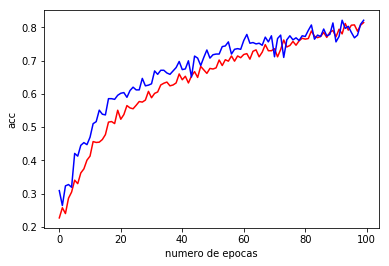

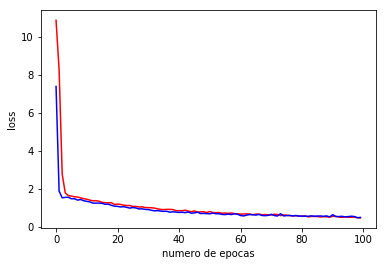

In [18]:
plt.figure(0)                                   
plt.plot(h.history['acc'],'r')
plt.plot(h.history['val_acc'],'b')
plt.xlabel('numero de epocas')
plt.ylabel('acc')
plt.figure(1)
plt.plot(h.history['loss'],'r')
plt.plot(h.history['val_loss'],'b')
plt.xlabel('numero de epocas')
plt.ylabel('loss')
print(h.params)

MATRIZ DE CONFUCION

In [0]:
from sklearn.metrics import classification_report, confusion_matrix, auc,roc_curve,accuracy_score,roc_auc_score,zero_one_loss

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

Y_pred = model.predict(X_test)

y_pred = np.argmax(Y_pred, axis=1)

  
                       

y_pred = model.predict_classes(X_test)

p=model.predict_proba(X_test) # to predict probability

target_names = ['limite 30km', 'limite 40km', 'limite 60km','pare','no parquear']
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))
#print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))
#tn,fp,fn,tp = confusion_matrix(y_test, Y_pred).ravel()



              precision    recall  f1-score   support

 limite 30km       0.72      0.95      0.82       152
 limite 40km       0.70      0.66      0.68        67
 limite 60km       0.72      0.37      0.49        62
        pare       0.96      0.99      0.98        81
 no parquear       0.98      0.87      0.92       130

    accuracy                           0.82       492
   macro avg       0.82      0.77      0.78       492
weighted avg       0.83      0.82      0.81       492



Confusion matrix, without normalization


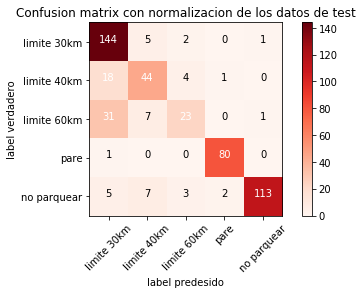

In [21]:
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
classes=5


import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 12.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('label verdadero')
    plt.xlabel('label predesido')
    
y_label=np.argmax(y_test, axis=1)


cnf_matrix = confusion_matrix(y_label,y_pred)
np.set_printoptions(precision=5)
class_names = ['limite 30km','limite 40km','limite 60km','pare','no parquear']

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix con normalizacion de los datos de test')

plt.show()

In [0]:
print(y_label[:10])
print(y_test[:10])
print(y_pred[:10])

[1 4 3 1 4 3 4 4 4 0]
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]]
[0 4 3 1 2 3 4 4 4 2]


In [0]:
'''fig, ax=plt.subplots(nrows=2,ncols=2)

for row in ax:
    for col in row:
        sn.set(font_scale=1)
        img_idx=randint(0,X_test.shape[0])
        img=X_test[img_idx]
        col.imshow(img)
        col.set_title(idx[y_pred[img_idx]])
        col.set_axis_off()
        print(img_idx,idx[y_pred[img_idx]],
             idx[np.argmax(y_test_[img_idx])])'''

'fig, ax=plt.subplots(nrows=2,ncols=2)\n\nfor row in ax:\n    for col in row:\n        sn.set(font_scale=1)\n        img_idx=randint(0,X_test.shape[0])\n        img=X_test[img_idx]\n        col.imshow(img)\n        col.set_title(idx[y_pred[img_idx]])\n        col.set_axis_off()\n        print(img_idx,idx[y_pred[img_idx]],\n             idx[np.argmax(y_test_[img_idx])])'

In [0]:
'''arr=np.array(nom)
print(nom.SignName)
arr_nom=nom.SignName
print(arr_nom.shape)
print(arr_nom[1])'''

'arr=np.array(nom)\nprint(nom.SignName)\narr_nom=nom.SignName\nprint(arr_nom.shape)\nprint(arr_nom[1])'

FUNCION DE PREDICCION

In [0]:
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import numpy as np


longitud, altura = 128, 128
modelo = '_Modelo_1.h5'
pesos_modelo = '_Pesos_1.h5'
cnn = load_model(modelo)
cnn.load_weights(pesos_modelo)



def predict(file):
  x = load_img(file, target_size=(longitud, altura))
  x = img_to_array(x)
    
  x = np.expand_dims(x, axis=0)
  array = cnn.predict(x)
  result = array[0]
  answer = np.argmax(result)
  if answer == 0:
    print('velocidad minima 30km')
  elif answer == 1:
    print('velocidad minima 40km')
  
  elif answer == 2:
    print('velocidad minima 60km')
  elif answer == 3:
    print('PARE')
  elif answer == 4:
    print('no parquear')  

In [23]:
from google.colab import files
files.upload( )

print('la imagen ingresada es una señal de transito :')
predict("pa.jpg")

la imagen ingresada es una señal de transito :


FileNotFoundError: ignored